Yafet Abraham Mekonnen

# Building a naive Bayes classifier to predict passenger survival on the *Titanic*

**Note:** The dataset is from the [Vanderbilt Biostatistics Datasets](https://hbiostat.org/data/).

## Data

You will be using the same [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) dataset we used in Assignment #3.

The file [`titanic.csv`](https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv) contains the details of the 1309 passengers on board and importantly, will reveal whether they survived or not.
The dataset file details include:

*   `pclass`: passenger class; proxy for socio-economic status (1st ~ upper, 2nd ~ middle, 3rd ~ lower)
*   `survived`: survival status (0=No, 1=Yes)
*   `name`: passenger name
*   `sex`: passenger sex (male, female)
*   `age`: passenger age in years (fractional if age is less than 1; if age is estimated, it is in the form xx.5)
*   `sibsp`: number of siblings/spouses aboard (includes step-siblings; mistresses and fiances ignored)
*   `parch`: number of parents/children aboard (parent only considers mother or father; child includes stepchildren)
*   `ticket`: ticket number
*   `fare`: passenger fare (in pre-1970 British pounds)
*   `cabin`: cabin number
*   `embarked`: port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)
*   `boat`: lifeboat number (if passenger boarded one)
*   `body`: body identification number
*   `home.dest`: passenger home/destination



# Solution

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:
url = "https://www.ecst.csuchico.edu/~bjuliano/csci581/datasets/titanic.csv"
df = pd.read_csv(url)
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object


1.   All pertinent *exploratory data analysis* (EDA) code, visualizations, and justifications;

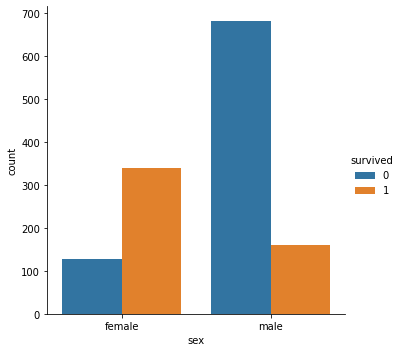

In [ ]:
sns.catplot(x ="sex", hue ="survived", kind ="count", data = df)


The graph above clearly shows that most male passengers did not survive the shipwreck comparing it with female passengers. Most of the passengers that survived were female.

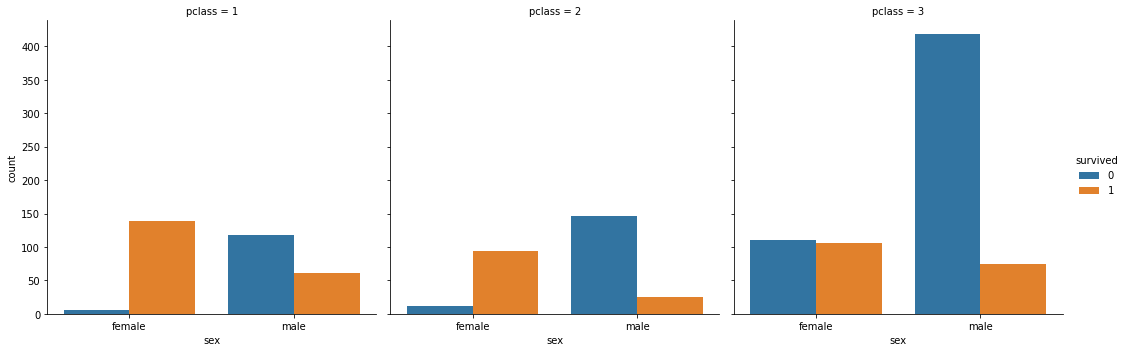

In [ ]:
sns.catplot(x ='sex', hue ='survived', kind ='count', col ='pclass', data = df)

The above graph also indicates that most of the male passengers did not survive. In addition, this graph provides more information about the socio-economic status where the lowest socio-economic class specifically the male having the highest death rate, and females in all socio-economic status have a lower death rate.  

In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df.age = imputer.fit_transform(df['age'].values.reshape(-1,1))[:,0]
df['age'].isnull().sum()

0

The code above replace the missing vaule of age with the most frequent vaules using the scikit-learn's SimpleImputer method. 

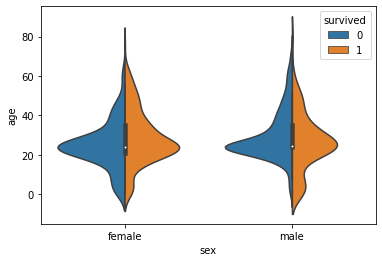

In [ ]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = df, split = True)

The graph above shows that in both genders most children within the age of 0 to 10 survived and the majority age group that did not survive is in the age between 20 to 40 in both genders, a male has more death rate in this group, but the death rate becomes less for both men and women as the age increase.

2.   Explanations/justifications for all model selection decisions;

The use of Naive Bayes classifier is used, it is a part of the probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between the features

3.   All pertinent model diagnostics, including metrics and visualizations;

In [ ]:
df.isnull().sum()


pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [ ]:
df.head()
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
df.fare = imputer.fit_transform(df['fare'].values.reshape(-1,1))[:,0]
df['fare'].isnull().sum()




0

The code above replace the missing vaule of fare with the mean using the scikit-learn's SimpleImputer method.

In [ ]:
sex_numerical = pd.get_dummies(df['sex'],drop_first=True) # convert the sex column to numeric 
df['Sex_Numerical'] = sex_numerical   # insert into the datasets
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Sex_Numerical
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


The above code changes the sex features from categorical variable to numerical variable because I want to use the sex features in the logistic regression model. Where a female is represented as 0 and a male is represented as 1.  

In [ ]:
df.drop(['name','sex','ticket','cabin','embarked','boat','home.dest','body'], axis=1,inplace=True)  # drop all these 


I chose to drop these features above because they would not help with the use of creating a Gaussian Naive Bayes (GaussianNB).



In [ ]:
corr = df.corr()
print(df.corr().abs().nlargest(5, 'survived').index) 


Index(['survived', 'Sex_Numerical', 'pclass', 'fare', 'parch'], dtype='object')


In the code above it print the top 4 feature with the highest correlation with survived feature using the correlation matrix. The correlation matrix above indicates that the top 4 features which are sex_numberical,pclass, fare, and parch have the highest correlation with survived. Which means these 4 are the best feature to use to create the model 


In [ ]:
features_v = df[['Sex_Numerical', 'pclass', 'fare', 'parch']]   
target_v = df['survived']

train_set, test_set, train_labels, test_labels = train_test_split(features_v, target_v,test_size = 0.25,random_state = 1, stratify = target_v) 


model = GaussianNB()
model.fit(train_set, train_labels)

# Print model parameters
print( 'Model parameters:', model.get_params() )



Model parameters: {'priors': None, 'var_smoothing': 1e-09}


In [ ]:
predict = model.predict(test_set)
t = confusion_matrix(test_labels,predict)
#creating table from our confusion_matrix
pd.DataFrame(t,columns=['Predict_no', 'Predict_yes'],index= ['Actual_no', 'Actual_yes'])



,Predict_no,Predict_yes
Actual_no,170,33
Actual_yes,41,84


 According to the confusion matrix table above the model predicted 170 passengers to not survive and 84 to survive which matches with the actual but comparing with the actual data 41 passengers were predicted not to survive however they survived, and 33 were predicted to survive but did not.  

In [ ]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(model.score(test_set , test_labels))



---Accuracy---
0.774390243902439


The model with 4 feature with the highest correlation accuracy of the prediction is 77.4%

In [ ]:
report = classification_report(test_labels,predict)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       203
           1       0.72      0.67      0.69       125

    accuracy                           0.77       328
   macro avg       0.76      0.75      0.76       328
weighted avg       0.77      0.77      0.77       328



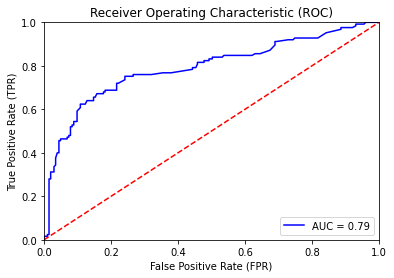

In [ ]:
probs = model.predict_proba(test_set)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_labels, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()



Using the highest four features from the correlation matrix 79% of area under the curve was calculated by plotting the Receiver Operating Characteristic (ROC) using the random classifier where the model was above it. 

In [ ]:
print(df.corr().abs().nlargest(4, 'survived').index)  #trying with three highest corrleated features 
features_v = df[['pclass','Sex_Numerical', 'fare']]   
target_v = df['survived']
train_set, test_set, train_labels, test_labels = train_test_split(features_v, target_v,test_size = 0.25,random_state = 1, stratify = target_v) 
model.fit(train_set, train_labels)

# Print model parameters
print( 'Model parameters:', model.get_params() )



Index(['survived', 'Sex_Numerical', 'pclass', 'fare'], dtype='object')
Model parameters: {'priors': None, 'var_smoothing': 1e-09}


Lets now try to make our model  better by only taking the top three to get a higher area of the curve

In [ ]:
predict = model.predict(test_set)
t = confusion_matrix(test_labels,predict)
#creating table from our confusion_matrix
pd.DataFrame(t,columns=['Predict_no', 'Predict_yes'],index= ['Actual_no', 'Actual_yes'])


,Predict_no,Predict_yes
Actual_no,168,35
Actual_yes,41,84


 According to the confusion matrix table above the model predicted 168 passengers to not survive and 84 to survive which matches with the actual but comparing with the actual data 41 passengers were predicted not to survive however they survived, and 35 were predicted to survive but did not. The confusion matrix did not make any significant change comparing with the one before. 

In [ ]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(model.score(test_set , test_labels))

---Accuracy---
0.7682926829268293


The model with 3 feature with the highest correlation accuracy of the prediction is 76.8%

In [ ]:
report = classification_report(test_labels,predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       203
           1       0.71      0.67      0.69       125

    accuracy                           0.77       328
   macro avg       0.75      0.75      0.75       328
weighted avg       0.77      0.77      0.77       328



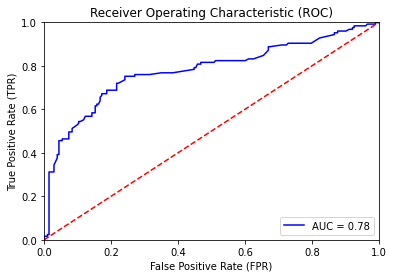

In [ ]:
#---find the predicted probabilities using the test set
probs = model.predict_proba(test_set)
preds = probs[:,1]

#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

#---find the area under the curve---
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

The area under the curve now lowered by one percent when I only chose the top 3 highest correlated features using the correlation matrix 

In [ ]:
print(df.corr().abs().nlargest(3, 'survived').index) 
features_v = df[['pclass','Sex_Numerical']]   
target_v = df['survived']
train_set, test_set, train_labels, test_labels = train_test_split(features_v, target_v,test_size = 0.25,random_state = 1, stratify = target_v) 
model.fit(train_set, train_labels)
# Print model parameters
print( 'Model parameters:', model.get_params() )

Index(['survived', 'Sex_Numerical', 'pclass'], dtype='object')
Model parameters: {'priors': None, 'var_smoothing': 1e-09}


Lets now try to make the model even better by only taking the top two to get a higher area of the curve  


In [ ]:
predict = model.predict(test_set)
t = confusion_matrix(test_labels,predict)
#creating table from our confusion_matrix
pd.DataFrame(t,columns=['Predict_no', 'Predict_yes'],index= ['Actual_no', 'Actual_yes'])


,Predict_no,Predict_yes
Actual_no,176,27
Actual_yes,43,82


The prediction not to survive and the actual not to survive increase which means the model showed improvement when only two highly correlated features are taken

In [ ]:
#---get the accuracy of the prediction---
print("---Accuracy---")
print(model.score(test_set , test_labels))

---Accuracy---
0.7865853658536586


The accuracy sightly increase as well by now being 
78.6% 

In [ ]:
report = classification_report(test_labels,predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       203
           1       0.75      0.66      0.70       125

    accuracy                           0.79       328
   macro avg       0.78      0.76      0.77       328
weighted avg       0.78      0.79      0.78       328



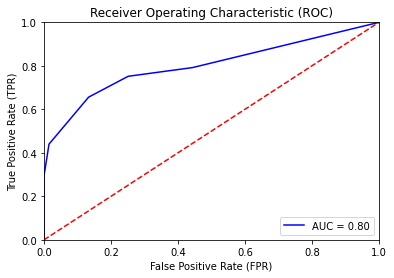

In [ ]:
probs = model.predict_proba(test_set)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_labels, preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()


The area under curve also increase now becomes 80% which means having the two highly corrleated featureas which are Sex_Numerical and pclass creates better model.

4.   your summary and conclusions pertaining to how this model compares (performance, pros, cons, etc.) to the model you derived in Assignment #3 (via `LogisticRegression`).

Using Logistic Regression creates a better prediction model this is seen by having a greater area under the curve values for all the same features used in the Receiver Operating Characteristic. In addition, it also creates a better confusion matrix by having a higher value in both predicting yes/ actual yes and predicting no / actual no values. In conclusion, when it comes to predicting passenger survival on Titanic Logistic Regression shows better performance and prediction rate compared with naive Bayes classifier.  